import dependencies and check data

In [1]:
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the data
train_df = pd.read_csv("playground-series-s4e2/train.csv")
test_df = pd.read_csv("playground-series-s4e2/test.csv")

In [6]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# First look of data

Found the original paper of this data: [Estimation of obesity levels based on dietary habits and condition physical using computational intelligence](https://www.sciencedirect.com/science/article/pii/S2352914822000521)

- Height: in meter
- Weight: in kg
- FAVC: Consume high-calorie foods frequently, boolean value
- FCVC: Number of meals where you usually eat vegetables, should be integer
- NCP Number of main meals a day, should be integer
- CAEC Eat food between meals, string description
- SMOKE boolean
- CH2O Liters of water you drink a day, float
- SCC: Whether monitor the calories you consume daily, boolean
- FAF: Frequency of days per week that you often have physical activity, float
- TUE Time of use of technological devices on a daily basis,
- CALC Frequency of alcohol intake. 3 unique string
- MTRANS Means of transportation that you use regularly. 5 unique string
- NObeyesdad Obesity state

In [11]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

We can see that all the data are filled. There is no need for us to deal with the missing data.


For the string data, we need to check on the unique values.

In [26]:
train_df["Gender"].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

In [25]:
train_df["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [24]:
train_df["SMOKE"].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [23]:
train_df["CALC"].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [22]:
train_df["MTRANS"].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [20]:
train_df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [28]:
train_df["FAVC"].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

In [29]:
train_df["CAEC"].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [30]:
train_df["SCC"].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

# Data Correlation

In order to find the correlation between data, we need to first map all the categorical data into integers.

In [27]:
# drop the id
train_df = train_df.drop(["id"], axis=1)

In [33]:
# gender mapping
gender_mapping = {"Female":0, "Male":1}
# family overweight history mapping
FHWO_mapping = {"no":0, "yes":1}
# FAVC mapping
FAVC_mapping = {"no":0, "yes":1}
# CAEC mapping
CAEC_mapping = {"no":0, "Sometimes":1, "Frequently":2, "Always":3}
# smoke mapping
smoke_mapping = {"no":0, "yes":1}
# SCC mapping
SCC_mapping = {"no":0, "yes":1}
# CALC mapping
CALC_mapping = {"no":0, "Sometimes":1, "Frequently":2}
# MTrans mapping
MTrans_mapping = {"Public_Transportation":0, "Automobile":1, "Walking":2, "Motorbike":3, "Bike":4}
# NObeyesdad mapping
NObey_mapping = {"Normal_Weight":0, "Insufficient_Weight":1, "Overweight_Level_I":2, "Overweight_Level_II":3, "Obesity_Type_I":4, "Obesity_Type_II":5, "Obesity_Type_III":6}

In [34]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
data = [train_df, test_df]
for dataset in data:
    dataset["Gender"] = dataset["Gender"].map(gender_mapping)
    dataset["family_history_with_overweight"] = dataset["family_history_with_overweight"].map(FHWO_mapping)
    dataset["FAVC"] = dataset["FAVC"].map(FAVC_mapping)
    dataset["CAEC"] = dataset["CAEC"].map(CAEC_mapping)
    dataset["SMOKE"] = dataset["SMOKE"].map(smoke_mapping)
    dataset["SCC"] = dataset["SCC"].map(SCC_mapping)
    dataset["CALC"] = dataset["CALC"].map(CALC_mapping)
    dataset["MTRANS"] = dataset["MTRANS"].map(MTrans_mapping)
train_df["NObeyesdad"] = train_df["NObeyesdad"].map(NObey_mapping)

In [36]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,1
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,6
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,3


<Axes: ylabel='Frequency'>

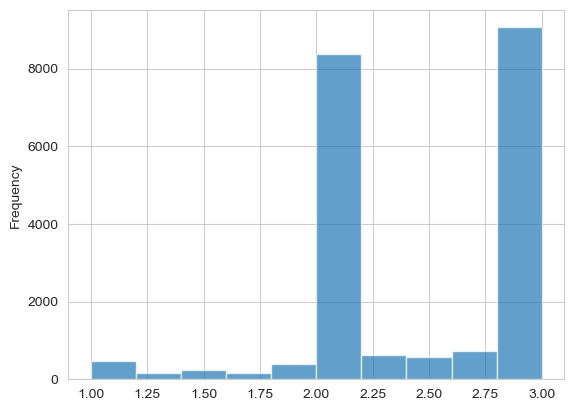

In [37]:
train_df["FCVC"].plot(kind='hist', bins=10, alpha=0.7)

After looking at the FCVC data, we are sure that we can round it to the nearest integer.

In [38]:
for dataset in data:
    dataset["FCVC"] = dataset["FCVC"].round().astype(int)

In [40]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,3
1,0,18.000000,1.560000,57.000000,1,1,2,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,0
2,0,18.000000,1.711460,50.165754,1,1,2,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,1
3,0,20.952737,1.710730,131.274851,1,1,3,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,6
4,1,31.641081,1.914186,93.798055,1,1,3,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,3


do the same for NCP

<Axes: ylabel='Frequency'>

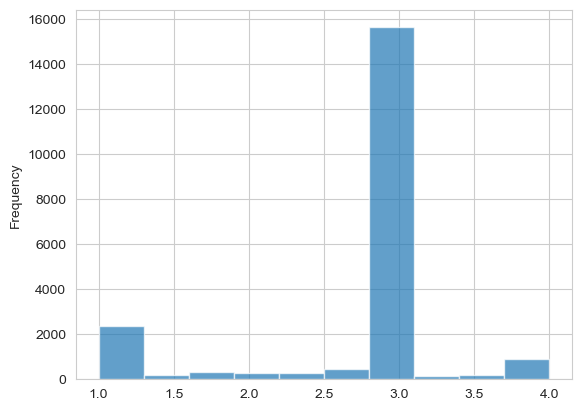

In [41]:
train_df["NCP"].plot(kind='hist', bins=10, alpha=0.7)

In [42]:
for dataset in data:
    dataset["NCP"] = dataset["NCP"].round().astype(int)

In [43]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2,3,1,0,2.763573,0,0.000000,0.976473,1,0,3
1,0,18.000000,1.560000,57.000000,1,1,2,3,2,0,2.000000,0,1.000000,1.000000,0,1,0
2,0,18.000000,1.711460,50.165754,1,1,2,1,1,0,1.910378,0,0.866045,1.673584,0,0,1
3,0,20.952737,1.710730,131.274851,1,1,3,3,1,0,1.674061,0,1.467863,0.780199,1,0,6
4,1,31.641081,1.914186,93.798055,1,1,3,2,1,0,1.979848,0,1.967973,0.931721,1,0,3


In [44]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,3,3,1,0,2.825629,0,0.855400,0.000000,1.0,0
1,20759,0,21.000000,1.600000,66.000000,1,1,2,1,1,0,3.000000,0,1.000000,0.000000,1.0,0
2,20760,0,26.000000,1.643355,111.600553,1,1,3,3,1,0,2.621877,0,0.000000,0.250502,1.0,0
3,20761,1,20.979254,1.553127,103.669116,1,1,2,3,1,0,2.786417,0,0.094851,0.000000,1.0,0
4,20762,0,26.000000,1.627396,104.835346,1,1,3,3,1,0,2.653531,0,0.000000,0.741069,1.0,0


There are 2 nans, we fill it with common value which is 1.0 and then transfer it to integers

In [53]:
test_df["CALC"] = test_df["CALC"].replace("common_value",1.0)
test_df["CALC"].value_counts()

CALC
1.0    9981
0.0    3513
2.0     346
Name: count, dtype: int64

In [54]:
test_df["CALC"] = test_df["CALC"].astype(int)

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  int64  
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  int32  
 7   NCP                             20758 non-null  int32  
 8   CAEC                            20758 non-null  int64  
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF                             

# Data Scaling

For categorical data we leave them there, while for float data we transform them.

In [57]:
# first split the feature df and target df
X_train = train_df.drop("NObeyesdad", axis=1)
Y_train = train_df["NObeyesdad"]
X_test = test_df.drop("id", axis=1).copy()

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler

In [59]:
# Assuming 'df' is your DataFrame
train_float_columns = train_df.select_dtypes(include=['float64']).columns
train_categorical_columns = train_df.select_dtypes(include=['int64', 'int32']).columns

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('float', MaxAbsScaler(), train_float_columns),],
    remainder='passthrough'  # This leaves the rest of the columns untransformed
)


In [61]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('float', MaxAbsScaler(),
                                 Index(['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE'], dtype='object'))])

In [62]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Models

## Random Forest

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [64]:
from sklearn.model_selection import cross_val_score

We use 10-fold validation

In [65]:
rf = RandomForestClassifier(n_estimators=100)
# 10-fold validation, therefore cv=10
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

Scores:  [0.9022158  0.89306358 0.89643545 0.88969171 0.90414258 0.9026975
 0.90077071 0.90414258 0.90313253 0.89686747]
Mean Score:  0.899315992292871
Std Score:  0.004786748894149531


## Logistic Regression

In [67]:
# logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial')
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

69.59

In [68]:
logreg = LogisticRegression()
# 10-fold validation, therefore cv=10
scores = cross_val_score(logreg, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

Scores:  [0.69460501 0.68930636 0.70712909 0.67822736 0.68063584 0.68641618
 0.69749518 0.68786127 0.68963855 0.68144578]
Mean Score:  0.6892760637927433
Std Score:  0.008264597939937966


## Decision Tree

In [69]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [71]:
decision_tree = DecisionTreeClassifier(class_weight='balanced')
# 10-fold validation, therefore cv=10
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

Scores:  [0.84585742 0.83526012 0.84200385 0.83959538 0.85356455 0.84007707
 0.8482659  0.85163776 0.84915663 0.84963855]
Mean Score:  0.8455057223112101
Std Score:  0.005677466380582205


## SGD

In [76]:
sgd = linear_model.SGDClassifier(max_iter=100, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test) # predict on the test data

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

68.87

## KNN Classifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

89.6

In [78]:
knn = KNeighborsClassifier(n_neighbors = 4)
# 10-fold validation, therefore cv=10
scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

Scores:  [0.84682081 0.83574181 0.84633911 0.83429672 0.84152216 0.85115607
 0.83477842 0.84585742 0.83951807 0.84963855]
Mean Score:  0.8425669150590803
Std Score:  0.005941042587365122


## Extreme Gradient Boosting (XGBoost)

In [79]:
from xgboost import XGBClassifier

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_xgb

97.94

In [81]:
xgb = XGBClassifier()
# 10-fold validation, therefore cv=10
scores = cross_val_score(xgb, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

Scores:  [0.9026975  0.9022158  0.90462428 0.89691715 0.91425819 0.9022158
 0.90414258 0.90510597 0.90409639 0.90746988]
Mean Score:  0.9043743529029411
Std Score:  0.004192155381979199


## Light Gradient Boosting Machine

In [82]:
from lightgbm import LGBMClassifier

In [83]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, Y_train) * 100, 2)
acc_lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 20758, number of used features: 16
[LightGBM] [Info] Start training from score -1.907353
[LightGBM] [Info] Start training from score -2.107483
[LightGBM] [Info] Start training from score -2.146276
[LightGBM] [Info] Start training from score -2.107879
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.854892
[LightGBM] [Info] Start training from score -1.635203


97.1

In [84]:
lgbm = LGBMClassifier()
# 10-fold validation, therefore cv=10
scores = cross_val_score(lgbm, X_train, Y_train, cv=10, scoring='accuracy')

print("Scores: ", scores)
print("Mean Score: ", scores.mean())
print("Std Score: ", scores.std())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM] [Info] Number of data points in the train set: 18682, number of used features: 16
[LightGBM] [Info] Start training from score -1.907270
[LightGBM] [Info] Start training from score -2.107340
[LightGBM] [Info] Start training from score -2.145945
[LightGBM] [Info] Start training from score -2.108221
[LightGBM] [Info] Start training from score -1.964768
[LightGBM] [Info] Start training from score -1.854950
[LightGBM] [Info] Start training from score -1.635302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1561
[LightGBM

We can see that among these models, the light BGM is the best.

In [85]:
Y_pred

array([5, 2, 6, ..., 1, 0, 5], dtype=int64)

In [95]:
submit_df = pd.DataFrame({'id':test_df['id'], 'NObeyesdad':pd.Series(Y_pred)})

In [96]:
submit_df

,id,NObeyesdad
0,20758,5
1,20759,2
2,20760,6
3,20761,4
4,20762,6
...,...,...
13835,34593,3
13836,34594,2
13837,34595,1
13838,34596,0


In [97]:
NObey_reverse_mapping = {v:k for k,v in NObey_mapping.items()}

In [98]:
submit_df['NObeyesdad'] = submit_df['NObeyesdad'].map(NObey_reverse_mapping)

In [99]:
submit_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [100]:
submit_df.to_csv('submission.csv', index=False)